In [1]:
# Will Nourse
# Feb 5 2021

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ipywidgets import interact_manual
#%matplotlib widget

In [2]:
# Variables
Cm = 10 # nF
Gm = 1 # uS
Iapp = 10 # nA
dt = 0.1 # ms
tmax = 100 # ms

t = np.arange(0,tmax,dt)
numSteps = np.size(t)
print(numSteps)

1000


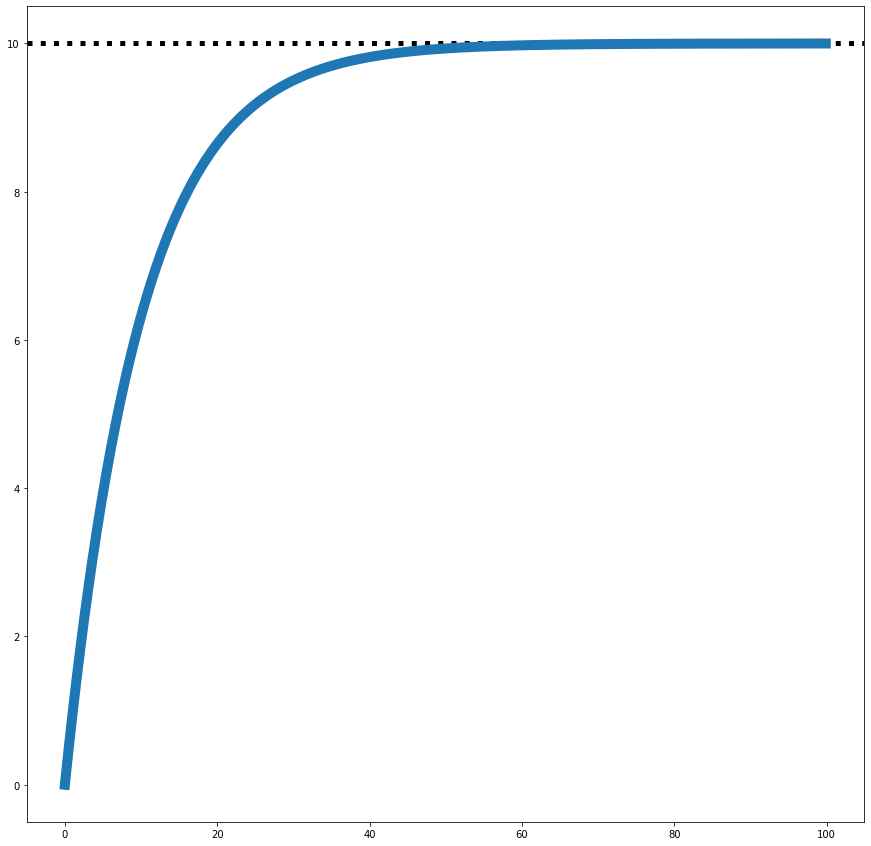

In [3]:
# Compute U(t) explicitly
tau = Cm/Gm
Uexp = Iapp/Gm*(1-np.exp(-t/tau))

# Plot
plt.figure(figsize=(15,15))
plt.axhline(y=Iapp,linestyle=':',color='k',linewidth=5)
plt.plot(t,Uexp,label='Explicit',linewidth=10)

Text(0.5, 1.0, 'U')

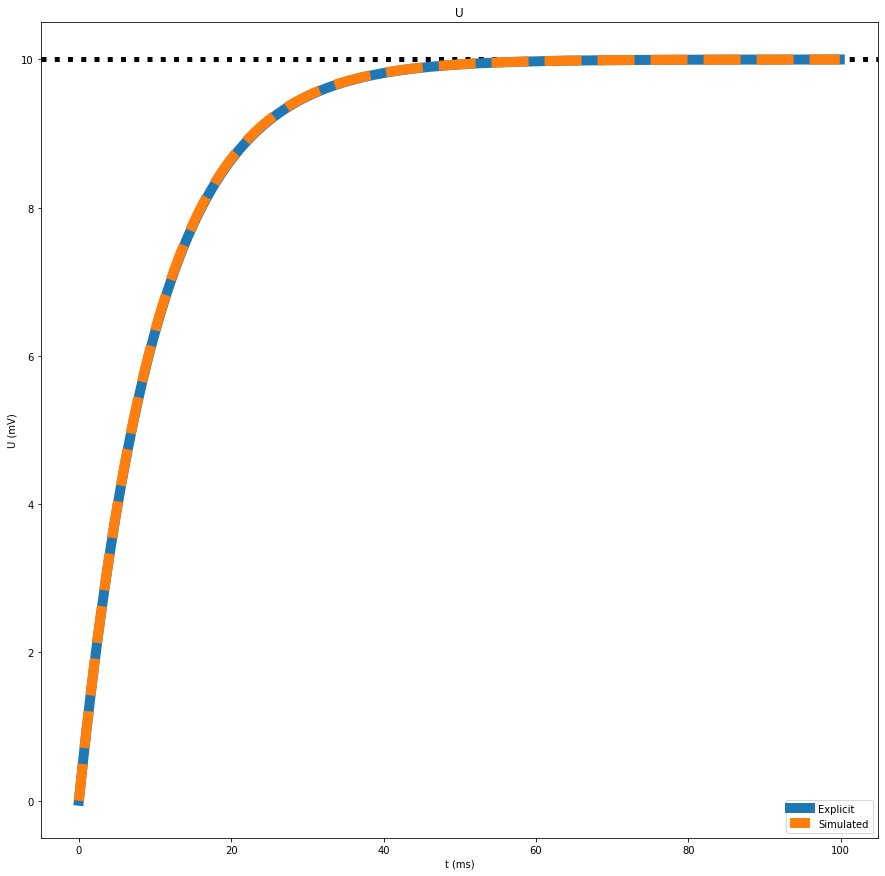

In [4]:
# Compute U(t) with simulation
Usim = np.zeros(np.size(t))

for i in range(1,numSteps):
    Usim[i] = Usim[i-1] + dt/Cm*(Iapp - Gm*Usim[i-1])
    
# Compare with the explicit solution
plt.figure(figsize=(15,15))
plt.axhline(y=Iapp,linestyle=':',color='k',linewidth=5)
plt.plot(t,Uexp,label='Explicit',linewidth=10)
plt.plot(t,Usim,'--',label='Simulated',linewidth=10)
plt.legend()
plt.ylabel('U (mV)')
plt.xlabel('t (ms)')
plt.title('U')

Text(0.5, 1.0, 'Simulation Error')

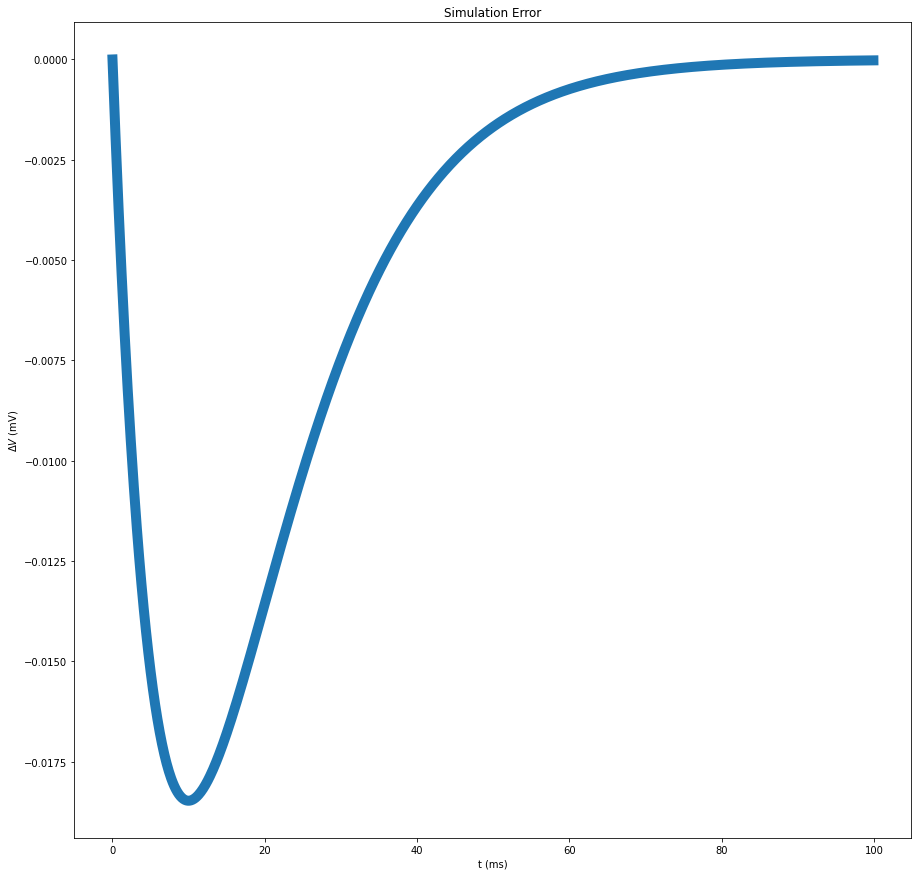

In [5]:
# Simulation Error
plt.figure(figsize=(15,15))
plt.plot(t,Uexp-Usim,linewidth=10)
plt.ylabel('$\Delta V$ (mV)')
plt.xlabel('t (ms)')
plt.title('Simulation Error')

In [6]:
#print("Tau: ",tau)
#tau=Cm/Gm
def varydt(dt=0.1):
    t=np.arange(0,tmax,dt)
    numsteps=np.size(t)
    current=Iapp+np.zeros(numsteps)
    # Compute U(t) explicitly
    Uexp = Iapp/Gm*(1-np.exp(-t/tau))

    # Compute V(t) with simulation
    Usim = np.zeros(np.size(t))

    for i in range(1,numsteps):
        Usim[i] = Usim[i-1] + dt/Cm*(Iapp-Gm*Usim[i-1])

    # Compare with the explicit solution
    plt.figure(figsize=(30,15))
    plt.subplot(1,2,1)
    plt.plot(t,current,':',label='Iapp',color='k',linewidth=5)
    plt.plot(t,Uexp,label='Explicit',linewidth=10)
    plt.plot(t,Usim,'--',label='Simulated',linewidth=10)
    plt.legend()
    plt.ylabel('U (mV)')
    plt.xlabel('t (ms)')
    plt.title('U')

    # Simulation Error
    plt.subplot(1,2,2)
    plt.plot(t,Uexp-Usim,linewidth=10)
    plt.ylabel('$\Delta V$ (mV)')
    plt.xlabel('t (ms)')
    plt.title('Simulation Error')
    
    return

interact_manual(varydt,dt=(0.0001,3*tau))

interactive(children=(FloatSlider(value=0.1, description='dt', max=30.0, min=0.0001), Button(description='Run …

<function __main__.varydt(dt=0.1)>